# MF Frames

Extract frames using the moral foundation theory as basis

In [6]:
import pandas as pd
from collections import Counter
import seaborn as sns
import umap
import matplotlib.pyplot as plt
import texthero as hero
import polarice
import polarice.preprocessing
from gensim.models import KeyedVectors, TranslationMatrix
import numpy as np

np.random.seed(42)

data_dir = "./data/exp2/"
limit_top_w2v = 500_000  # 100k misses some aspects of translation matrix

In [7]:
labelled_tweets = pd.read_csv(data_dir + "follower_tweets_german_corona_labelled.csv", index_col=0, lineterminator="\n")
labelled_tweets.info()

/home/mreiterhaas/miniconda3/envs/polarice/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22205 entries, 1285876165014691840 to 1243175087366438913
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 22205 non-null  object 
 1   id_str                     22205 non-null  int64  
 2   text                       22205 non-null  object 
 3   truncated                  22205 non-null  bool   
 4   entities                   22205 non-null  object 
 5   source                     22205 non-null  object 
 6   in_reply_to_status_id      2397 non-null   float64
 7   in_reply_to_status_id_str  2397 non-null   float64
 8   in_reply_to_user_id        2583 non-null   float64
 9   in_reply_to_user_id_str    2583 non-null   float64
 10  in_reply_to_screen_name    2583 non-null   object 
 11  user                       22205 non-null  object 
 12  geo                        21 non-null     object 
 13  coordinates   

In [8]:
labelled_tweets["handle"].value_counts()

sebastiankurz    17230
WKogler           2090
rendiwagner       1164
BMeinl             901
norbertghofer      820
Name: handle, dtype: int64

In [3]:
german_tweet_pipeline = polarice.preprocessing.GERMAN_TWEET_PIPELINE
labelled_tweets["cleaned"] = labelled_tweets["text"].pipe(hero.clean, pipeline=german_tweet_pipeline)

In [4]:
# TODO: remove after it is part of lib and load lib in
%run frame_axis.py
fs = FrameSystem.load("moral.pkl")
fs.frame_axes

{'care/harm': <__main__.FrameAxis at 0x7f1c9a20e100>,
 'fairness/cheating': <__main__.FrameAxis at 0x7f1cd854c4c0>,
 'loyalty/betrayal': <__main__.FrameAxis at 0x7f1c9a256fd0>,
 'authority/subversion': <__main__.FrameAxis at 0x7f1c9a256f70>,
 'sanctity/degradation': <__main__.FrameAxis at 0x7f1c9a20eb20>}

In [5]:
## From https://fasttext.cc/docs/en/crawl-vectors.html
model_en = KeyedVectors.load_word2vec_format("cc.en.300.vec.gz", binary=False, limit=limit_top_w2v)
model_de = KeyedVectors.load_word2vec_format("cc.de.300.vec.gz", binary=False, limit=limit_top_w2v)

In [6]:
# Example pairs from: https://www.researchgate.net/figure/List-of-German-Words-With-Positive-and-Negative-Valence-and-Their-English-Translations_tbl1_323648179
word_pairs = [
#     positive valence
    ("savior", "Retter"),
    ("cheer", "Jubel"),
    ("talent", "Talent"),
    ("celebration", "Feier"),
    ("party", "Party"),
    ("profit", "Gewinn"),
    ("humor", "Humor"),
    ("hobby", "Hobby"),
    ("journey", "Reise"),
    ("joy", "Freude"),
#     negative valennce
    ("tyrant", "Tyrann"),
    ("penalty", "Strafe"),
    ("atrocity", "Greuel"),
    ("grief", "Trauer"),
    ("victim", "Opfer"),
#     ("exhaust gas", "Abgas"),
    ("fraud", "Betrug"),
    ("plague", "Plage"),
    ("arrest", "Arrest"),
    ("command", "Befehl"),
]

transmat = TranslationMatrix(source_lang_vec=model_en, target_lang_vec=model_de, word_pairs=word_pairs)

# Test

In [7]:
virtues = ["care", "fairness", "loyalty", "authority", "sanctity", "liberty", "good"]
vices = ["harm", "cheating", "betrayal", "subversion", "degradation", "oppression", "evil"]

In [8]:
virtue_trans = transmat.translate(virtues)
virtue_trans

OrderedDict([('care',
              ['Trauer', 'Verzweiflung', 'Hass', 'Schmerz', 'Schadenfreude']),
             ('fairness',
              ['Humor', 'Freude', 'Witz', 'Schadenfreude', 'Gewinn']),
             ('loyalty',
              ['Gewinn', 'Erfolg', 'Betrug', 'Verrat', 'Enthusiasmus']),
             ('authority',
              ['Befehl', 'Kommando', 'Arrest', 'Befehlen', 'Befehle']),
             ('sanctity',
              ['Freude', 'Feier', 'Ehre', 'Feierlichkeit', 'Freuden']),
             ('liberty', ['Gewinn', 'Freude', 'Tyrann', 'Laune', 'Spaß']),
             ('good',
              ['Freude',
               'Enthusiasmus',
               'Begeisterung',
               'Ehrgeiz',
               'Gewinn'])])

In [9]:
vice_trans = transmat.translate(vices, topn=5)
vice_trans

OrderedDict([('harm',
              ['Gewinn', 'Schadenfreude', 'Freude', 'Strafe', 'Genugtuung']),
             ('cheating',
              ['Betrug', 'Erpressung', 'Betrugs', 'Betrügereien', 'Abzocke']),
             ('betrayal',
              ['Trauer',
               'Verzweiflung',
               'Traurigkeit',
               'Grausamkeit',
               'Angst']),
             ('subversion', ['Humor', 'Witz', 'Tyrann', 'Verrat', 'Betrug']),
             ('degradation',
              ['Strafe', 'Greuel', 'Sünde', 'Verbrechen', 'Grausamkeit']),
             ('oppression',
              ['Tyrann', 'Grausamkeit', 'Bosheit', 'Tyrannen', 'Tyrannei']),
             ('evil',
              ['Tyrann', 'Tyrannen', 'Bosheit', 'Retter', 'Grausamkeit'])])

# Translate Frame Axis

In [10]:
# TODO: remove after it is part of lib
%run frame_axis.py
fs = FrameSystem.load("moral.pkl")
fs.frame_axes

{'care/harm': <__main__.FrameAxis at 0x7f1c9a256f40>,
 'fairness/cheating': <__main__.FrameAxis at 0x7f1b9d956af0>,
 'loyalty/betrayal': <__main__.FrameAxis at 0x7f1b9d956f70>,
 'authority/subversion': <__main__.FrameAxis at 0x7f1b9d9564f0>,
 'sanctity/degradation': <__main__.FrameAxis at 0x7f1b9d956a60>}

In [11]:
fs.frame_axes["care/harm"].attach_model(model_en)
fs.frame_axes["care/harm"].compute()
care_words = fs.frame_axes["care/harm"].pos_words
care_trans = transmat.translate(care_words, topn=1)
list(care_trans.items())[:5]

[('compassion', ['Trauer']),
 ('empathy', ['Humor']),
 ('kindness', ['Freude']),
 ('caring', ['Trauer']),
 ('generosity', ['Freude'])]

In [12]:
def translations_only(trans_dict):
    trans_words = set()
    for words in trans_dict.values():
        trans_words.update(words)
    return trans_words

care_trans_words = translations_only(care_trans)
care_trans_words

{'Arrest',
 'Befehl',
 'Betrug',
 'Feier',
 'Freude',
 'Gewinn',
 'Grausamkeit',
 'Hobby',
 'Humor',
 'Jubel',
 'Mitleid',
 'Opfer',
 'Plage',
 'Reise',
 'Retter',
 'Talent',
 'Trauer',
 'Tyrann'}

In [13]:
FramePole("care", care_trans_words, model_de).compute()

18


In [14]:
def transform_frame_system(frame_system, model_old, model_new):
    trans_axes = {}
    for name, axis in frame_system.frame_axes.items():
        axis.attach_model(model_old)
        axis.compute()
        pos_trans = translations_only(transmat.translate(axis.pos_words, topn=1))
        neg_trans = translations_only(transmat.translate(axis.neg_words, topn=1))
        fa = FrameAxis(name, pos_trans, neg_trans, "model_new", model_new)
        trans_axes[name] = fa
    return FrameSystem(trans_axes)

fs_new = transform_frame_system(fs, model_en, model_de)
fs_new

In [15]:
fs.compute_baseline_biases(labelled_tweets, "cleaned", model_de)

{'care/harm': 0.01851844748371204,
 'fairness/cheating': -0.012293665373022027,
 'loyalty/betrayal': 0.005927898520874667,
 'authority/subversion': 0.01263637227598477,
 'sanctity/degradation': -0.009240866734967561}

In [ ]:
trans_df = fs.transform_df(labelled_tweets, "cleaned", model_de)
trans_df  # output clear for privacy

# Analyze per Group

In [17]:
bias_cols = [col for col in labelled_tweets if col.endswith("_bias")]
intensity_cols = [col for col in labelled_tweets if col.endswith("_inte")]
moral_cols = bias_cols + intensity_cols

In [18]:
cm = sns.light_palette("green", as_cmap=True)

groups = labelled_tweets.groupby("handle")[moral_cols]
group_moral = groups.mean()

In [19]:
latex_df = group_moral.transpose()
latex_df.index = pd.MultiIndex.from_tuples(latex_df.index.str.split('_').tolist())
latex_df = latex_df.swaplevel(0, 1, 0)
latex_df = latex_df.rename(index={
    "care": "Care",
    "fair": "Fairness",
    "loya": "Loyalty",
    "auth": "Authority",
    "sanc": "Sanctity",
    "bias": "Bias",
    "intensity": "Intensity"
})
latex_df = latex_df * 100  # for easier readability
print(latex_df.to_latex(multirow=True, float_format="%.3f"))

\begin{tabular}{llrrrrr}
\toprule
     & handle &  BMeinl &  WKogler &  norbertghofer &  rendiwagner &  sebastiankurz \\
\midrule
\multirow{5}{*}{Bias} & Care &   1.622 &    1.793 &          1.830 &        1.882 &          1.870 \\
     & Fairness &  -1.150 &   -1.013 &         -1.204 &       -1.052 &         -1.273 \\
     & Loyalty &   0.508 &    0.593 &          0.617 &        0.556 &          0.599 \\
     & Authority &   1.193 &    1.252 &          1.308 &        1.333 &          1.262 \\
     & Sanctity &  -1.003 &   -0.943 &         -0.740 &       -0.846 &         -0.932 \\
\cline{1-7}
\multirow{5}{*}{inte} & Care &   0.239 &    0.240 &          0.255 &        0.253 &          0.249 \\
     & Fairness &   0.187 &    0.181 &          0.187 &        0.182 &          0.185 \\
     & Loyalty &   0.166 &    0.166 &          0.178 &        0.167 &          0.171 \\
     & Authority &   0.158 &    0.157 &          0.166 &        0.154 &          0.162 \\
     & Sanctity &   0.188 &    

In [20]:
latex_df.style.background_gradient(cmap=cm, axis=1)

# Classification

In [21]:
y_label = "handle"

In [22]:
bias_cols = [col for col in labelled_tweets if col.endswith("_bias")]
intensity_cols = [col for col in labelled_tweets if col.endswith("_inte")]
moral_cols = bias_cols + intensity_cols

In [23]:
Y = labelled_tweets[y_label].values
X = labelled_tweets[moral_cols].values
print(X.shape)
print(np.expand_dims(Y, axis=1).shape)
np.concatenate([X, np.expand_dims(Y, axis=1)], axis=1)

(22205, 10)
(22205, 1)


array([[0.042090144008398056, -0.010791267268359661,
        -0.009655128233134747, ..., 0.0008328041876666248,
        0.00037132322904653847, 'norbertghofer'],
       [0.039963182806968686, 0.03574837446212768, 0.029774656891822814,
        ..., 0.0023879304528236387, 0.000933664757758379,
        'norbertghofer'],
       [0.006778024137020111, -0.040702935308218, 0.0026229005306959152,
        ..., 0.0016073163133114576, 0.0007585710845887661,
        'norbertghofer'],
       ...,
       [0.02394310136636098, -0.008668599857224358, 0.005321538282765282,
        ..., 0.0008060077412260903, 0.001651453682117992, 'rendiwagner'],
       [0.02484341628021664, -0.00844273136721717, 0.01694544818666246,
        ..., 0.0005479100574221876, 0.0028669018712308672, 'rendiwagner'],
       [0.009926149249076843, 0.004325709491968155, 0.012591913342475891,
        ..., 0.0015102806501090527, 0.0018842179328203202, 'rendiwagner']],
      dtype=object)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)
classifier = LogisticRegression(max_iter=1000, penalty="l1", solver="saga", class_weight="balanced").fit(X_train, Y_train)
    
Y_pred = classifier.predict(X_test)
classification_report(Y_test, Y_pred, output_dict=True)

/home/mreiterhaas/miniconda3/envs/polarice/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/mreiterhaas/miniconda3/envs/polarice/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'BMeinl': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 237},
 'WKogler': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 534},
 'norbertghofer': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 193},
 'rendiwagner': {'precision': 0.048270893371757925,
  'recall': 1.0,
  'f1-score': 0.09209621993127148,
  'support': 268},
 'sebastiankurz': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 4320},
 'accuracy': 0.048270893371757925,
 'macro avg': {'precision': 0.009654178674351584,
  'recall': 0.2,
  'f1-score': 0.018419243986254295,
  'support': 5552},
 'weighted avg': {'precision': 0.0023300791469076233,
  'recall': 0.048270893371757925,
  'f1-score': 0.004445566812244373,
  'support': 5552}}

In [32]:
print(classification_report(Y_test, Y_pred))

               precision    recall  f1-score   support

       BMeinl       0.00      0.00      0.00       237
      WKogler       0.00      0.00      0.00       534
norbertghofer       0.00      0.00      0.00       193
  rendiwagner       0.05      1.00      0.09       268
sebastiankurz       0.00      0.00      0.00      4320

     accuracy                           0.05      5552
    macro avg       0.01      0.20      0.02      5552
 weighted avg       0.00      0.05      0.00      5552



In [33]:
classifier.coef_

array([[-7.88361304e-01, -1.37523415e+00, -7.79941538e-02,
        -3.48433693e-02, -3.67327740e+00,  7.70765624e-02,
         7.23846902e-02,  2.54499195e-03,  8.01151354e-03,
         1.04302811e-01],
       [-4.62894152e-01,  1.24939313e+01, -9.98289187e-01,
        -1.07793792e+00, -4.57318765e-01, -3.91199555e-02,
        -4.63921946e-02,  3.10659605e-03,  1.66032378e-03,
        -8.08283785e-03],
       [-4.68211192e+00, -9.16517190e+00,  2.62713189e+00,
        -3.65936141e-01,  1.56448259e+01,  1.09884365e-03,
         3.79663643e-02, -2.74498102e-03, -9.36704407e-03,
        -2.28120992e-02],
       [ 2.14101623e+00,  2.40752971e+00, -7.98698104e+00,
         2.56117613e+00, -1.45067150e-01, -9.98822836e-03,
        -6.60276286e-02,  1.39369216e-03,  7.29296312e-03,
        -2.02358385e-02],
       [ 6.93118476e+00, -1.34076191e+01,  6.49393881e-01,
        -2.90640469e-01,  4.57590666e-01, -1.06053153e-02,
         1.80844090e-02, -9.35629556e-03, -2.99457624e-03,
        -3.

In [38]:
classifier.classes_

array(['BMeinl', 'WKogler', 'norbertghofer', 'rendiwagner',
       'sebastiankurz'], dtype=object)

In [87]:
coef_df = pd.DataFrame.from_records(classifier.coef_, index=classifier.classes_, columns=moral_cols)
print(coef_df.to_latex())  # TODO: format the table
coef_df

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  care\_bias &  fair\_bias &  loya\_bias &  auth\_bias &  sanc\_bias &  care\_inte &  fair\_inte &  loya\_inte &  auth\_inte &  sanc\_inte \\
\midrule
BMeinl        &  -0.788361 &  -1.375234 &  -0.077994 &  -0.034843 &  -3.673277 &   0.077077 &   0.072385 &   0.002545 &   0.008012 &   0.104303 \\
WKogler       &  -0.462894 &  12.493931 &  -0.998289 &  -1.077938 &  -0.457319 &  -0.039120 &  -0.046392 &   0.003107 &   0.001660 &  -0.008083 \\
norbertghofer &  -4.682112 &  -9.165172 &   2.627132 &  -0.365936 &  15.644826 &   0.001099 &   0.037966 &  -0.002745 &  -0.009367 &  -0.022812 \\
rendiwagner   &   2.141016 &   2.407530 &  -7.986981 &   2.561176 &  -0.145067 &  -0.009988 &  -0.066028 &   0.001394 &   0.007293 &  -0.020236 \\
sebastiankurz &   6.931185 & -13.407619 &   0.649394 &  -0.290640 &   0.457591 &  -0.010605 &   0.018084 &  -0.009356 &  -0.002995 &  -0.033530 \\
\bottomrule
\end{tabular}



,care_bias,fair_bias,loya_bias,auth_bias,sanc_bias,care_inte,fair_inte,loya_inte,auth_inte,sanc_inte
BMeinl,-0.788361,-1.375234,-0.077994,-0.034843,-3.673277,0.077077,0.072385,0.002545,0.008012,0.104303
WKogler,-0.462894,12.493931,-0.998289,-1.077938,-0.457319,-0.039120,-0.046392,0.003107,0.001660,-0.008083
norbertghofer,-4.682112,-9.165172,2.627132,-0.365936,15.644826,0.001099,0.037966,-0.002745,-0.009367,-0.022812
rendiwagner,2.141016,2.407530,-7.986981,2.561176,-0.145067,-0.009988,-0.066028,0.001394,0.007293,-0.020236
sebastiankurz,6.931185,-13.407619,0.649394,-0.290640,0.457591,-0.010605,0.018084,-0.009356,-0.002995,-0.033530


In [66]:
coef_df = coef_df.stack().to_frame().reset_index()
coef_df[["moral", "bias/inte"]] = coef_df["level_1"].str.split("_", expand=True)
coef_df = coef_df.drop(columns=["level_1"])
coef_df = coef_df.rename(columns={"level_0": "handle", 0: "coef"})
coef_df

,handle,coef,moral,bias/inte
0,BMeinl,-0.788361,care,bias
1,BMeinl,-1.375234,fair,bias
2,BMeinl,-0.077994,loya,bias
3,BMeinl,-0.034843,auth,bias
4,BMeinl,-3.673277,sanc,bias
5,BMeinl,0.077077,care,inte
6,BMeinl,0.072385,fair,inte
7,BMeinl,0.002545,loya,inte
8,BMeinl,0.008012,auth,inte
9,BMeinl,0.104303,sanc,inte


<AxesSubplot:xlabel='moral', ylabel='coef'>

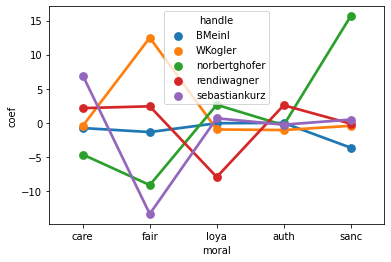

In [68]:
bias_df = coef_df[coef_df["bias/inte"] == "bias"]
sns.pointplot(data=bias_df, x="moral", y="coef", hue="handle")

<AxesSubplot:xlabel='moral', ylabel='coef'>

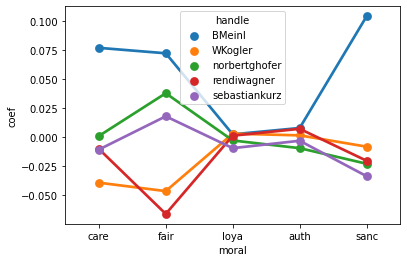

In [69]:
inte_df = coef_df[coef_df["bias/inte"] == "inte"]
sns.pointplot(data=inte_df, x="moral", y="coef", hue="handle")

In [ ]:
# pairplot on traindata: https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html
dataset = labelled_tweets[[y_label] + moral_cols].copy()
dataset  # output clear for privacy

In [84]:
ds = dataset.sample(1000)

In [ ]:
%%time
g = sns.pairplot(ds, kind="reg", diag_kind="kde", hue="handle")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.savefig("pairplot_austria.pdf", dpi=300)
plt.show()